# Chapter 10 - Supervised Learning - Classification Techniques

In [2]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#import warnings
#warnings.filterwarnings("ignore")

# Naive Bayes Classification


Naive Bayes is a simple, fast, accurate, and easy-to-understand method for prediction. It
has a lower computation cost and can work with large datasets. Naive Bayes can also be
employed in multi-class classification problems. The naive Bayes classifier performs better
compared to logistic regression when data has a class independence assumption.

Naive Bayes suffers from the **Zero Frequency Problem**. Zero frequency means that if any
category in the feature is missing, then it will have a zero frequency count. This problem is
solved by Laplacian correction. Laplacian correction (or Laplace transformation) is a kind of
smoothing technique that will add one record for each class so that the frequency count for
the missing class will become 1, thus probabilities of Bayes' theorem will not be affected.
Another issue with naive Bayes is its assumption of class conditional independence, as it is
practically impossible for all the predictors to be fully independent. 

In [5]:
# Use the raw link to access the actual CSV file
url = "https://raw.githubusercontent.com/PacktPublishing/Python-Data-Analysis-Third-Edition/refs/heads/master/Chapter09/diabetes.csv"

# Reading the CSV file
diabetes = pd.read_csv(url)

# Display the first 5 rows of the DataFrame
diabetes.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
# split dataset in two parts: feature set and target label
feature_set = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree'] 

features = diabetes[feature_set]
target = diabetes['label']                       # If apply 'target = diabetes[['label']]', model.fit will be
                                                 # model.fit:(feature_train, target_train.values.ravel())

# partition data into training and testing set
from sklearn.model_selection import train_test_split

feature_train,feature_test, target_train, target_test = train_test_split(features, 
                                                                         target, 
                                                                         test_size=0.3, 
                                                                         random_state=1)

In [7]:
# Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

# Create a Gaussian Classifier
model = GaussianNB()

# Train the model using the training sets
model.fit(feature_train, target_train)

# Forecast the target variable for the given test dataset
predictions = model.predict(feature_test)

In [8]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

# Calculate model accuracy
print("Accuracy:",accuracy_score(target_test, predictions))

# Calculate model precision
print("Precision:",precision_score(target_test, predictions))

# Calculate model recall
print("Recall:",recall_score(target_test, predictions))

# Calculate model f1 score
print("F1-Score:",f1_score(target_test, predictions))

Accuracy: 0.7748917748917749
Precision: 0.7391304347826086
Recall: 0.6
F1-Score: 0.6623376623376623


In [9]:
# Get the class labels
classes = model.classes_

# Get the mean and variance for each feature per class
means = pd.DataFrame(model.theta_, columns=feature_train.columns, index=classes)
variances = pd.DataFrame(model.var_, columns=feature_train.columns, index=classes)

print("Class Means:\n", means.round(4))
print("\nClass Variances:\n", variances.round(4))

Class Means:
    pregnant   insulin      bmi      age   glucose       bp  pedigree
0    3.3023   65.7627  30.2610  31.4209  110.8898  68.9096    0.4332
1    4.6393  100.2077  34.8913  36.9727  140.5628  69.0328    0.5359

Class Variances:
    pregnant     insulin      bmi       age   glucose        bp  pedigree
0    9.3917   9531.1414  52.3357  137.6166  723.0246  309.4777    0.0974
1   13.6295  17992.3394  57.1608  132.9665  880.2351  586.4252    0.1297


#### Class Means
The mean values indicate the average value of each feature within each class. For instance:

Class 0 (first row): Represents the samples in class 0 (e.g., those who do not have a condition).

    pregnant: The average number of pregnancies for samples in class 0 is 3.3023.
    insulin: The average insulin level for samples in class 0 is 65.7627.

Class 1 (second row): Represents the samples in class 1 (e.g., those who have the condition).

    pregnant: The average number of pregnancies for samples in class 1 is 4.6393.
    glucose: The average glucose level for samples in class 1 is 140.5628 (much higher than in class 0).

#### Class Variances
The variance values indicate how spread out each feature is within each class. A higher variance means that the feature values are more spread out, while a lower variance means they are more tightly grouped around the mean.

Class 0 (first row):

    pregnant: The variance is 9.3917, indicating how much the number of pregnancies varies within class 0.
    glucose: The variance is 723.0246, suggesting how spread out glucose levels are for samples in class 0.
    Variance is generally high for features like insulin (9531.1414) and glucose, indicating a wide spread of values.
Class 1 (second row):

    pregnant: The variance is 13.6295, indicating a slightly higher spread of pregnancies compared to class 0.
    insulin: The variance is 17992.3394, which is very high, indicating a large spread of insulin values within class 1.

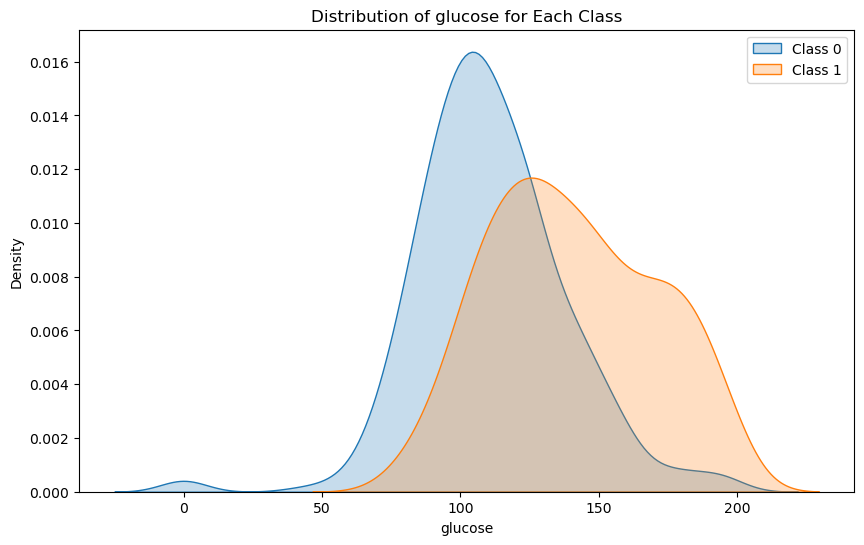

In [11]:
# Select a feature to plot (change 'glucose' to any feature of interest)
feature = 'glucose'

# Plot the distribution of the feature for each class
plt.figure(figsize=(10, 6))
for class_value in classes:
    sns.kdeplot(feature_train[feature][target_train.values.ravel() == class_value], 
                label=f'Class {class_value}', fill=True)
plt.title(f'Distribution of {feature} for Each Class')
plt.xlabel(feature)
plt.ylabel('Density')
plt.legend()
plt.show()

In [12]:
# Get predicted probabilities for the test data
probabilities = model.predict_proba(feature_test)

# Create a DataFrame to show probabilities for the first 5 samples
prob_df = pd.DataFrame(probabilities, columns=[f'Probability of Class {c}' for c in classes])
print(prob_df.head())

   Probability of Class 0  Probability of Class 1
0                0.560534                0.439466
1                0.889807                0.110193
2                0.954263                0.045737
3                0.959157                0.040843
4                0.854398                0.145602


#### Sample 0:

    Probability of Class 0: 0.560534
This means the model predicts that sample 0 has a 56.05% chance of belonging to Class 0.

    Probability of Class 1: 0.439466
The model predicts a 43.95% chance of belonging to Class 1.
Since the probability of Class 0 is higher, the model will classify this sample as Class 0.
    
#### Sample 1:

    Probability of Class 0: 0.889807
The model predicts an 88.98% chance of belonging to Class 0.

    Probability of Class 1: 0.110193
The model predicts an 11.02% chance of belonging to Class 1.
The model is very confident in this case that the sample belongs to Class 0.
    
#### Sample 2:

    Probability of Class 0: 0.954263
A 95.43% chance of belonging to Class 0.

    Probability of Class 1: 0.045737
A 4.57% chance of belonging to Class 1.
The model is even more confident here that the sample belongs to Class 0.
    
#### Sample 3:

    Probability of Class 0: 0.959157
A 95.92% chance of belonging to Class 0.

    Probability of Class 1: 0.040843
A 4.08% chance of belonging to Class 1.
The model strongly predicts Class 0 for this sample.
    
#### Sample 4:

    Probability of Class 0: 0.854398
An 85.44% chance of belonging to Class 0.

    Probability of Class 1: 0.145602
A 14.56% chance of belonging to Class 1.
The model is confident that the sample belongs to Class 0 but with slightly less certainty than the previous samples.

In [14]:
print(prob_df)

     Probability of Class 0  Probability of Class 1
0                  0.560534                0.439466
1                  0.889807                0.110193
2                  0.954263                0.045737
3                  0.959157                0.040843
4                  0.854398                0.145602
..                      ...                     ...
226                0.965824                0.034176
227                0.941892                0.058108
228                0.982880                0.017120
229                0.128655                0.871345
230                0.622990                0.377010

[231 rows x 2 columns]


# Decision Tree Classification

In [16]:
# Import Decision Tree model
from sklearn.tree import DecisionTreeClassifier

# Create a Decision Tree classifier object
clf = DecisionTreeClassifier()

# Train the model using training dataset
clf = clf.fit(feature_train,target_train)

# Predict the response for test dataset
predictions = clf.predict(feature_test)

In [17]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

# Calculate model accuracy
print("Accuracy:",accuracy_score(target_test, predictions))

# Calculate model precision
print("Precision:",precision_score(target_test, predictions))

# Calculate model recall
print("Recall:",recall_score(target_test, predictions))

# Calculate model f1 score
print("F1-Score:",f1_score(target_test, predictions))

Accuracy: 0.6926406926406926
Precision: 0.5972222222222222
Recall: 0.5058823529411764
F1-Score: 0.5477707006369427


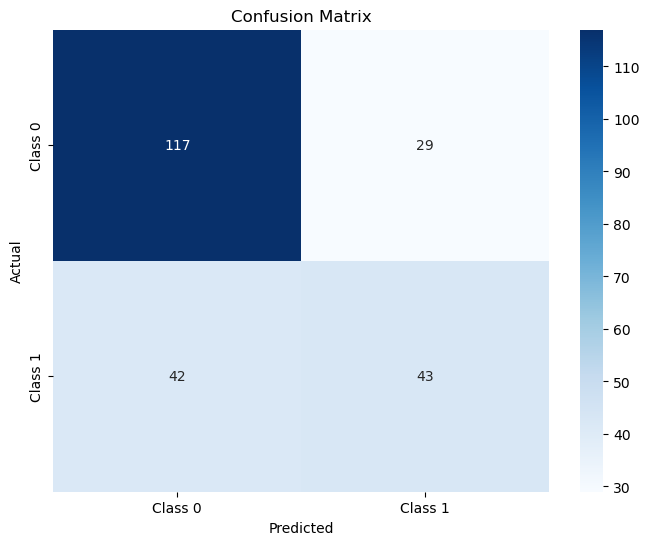

In [18]:
from sklearn.metrics import confusion_matrix

# Generate the confusion matrix
cm = confusion_matrix(target_test, predictions)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

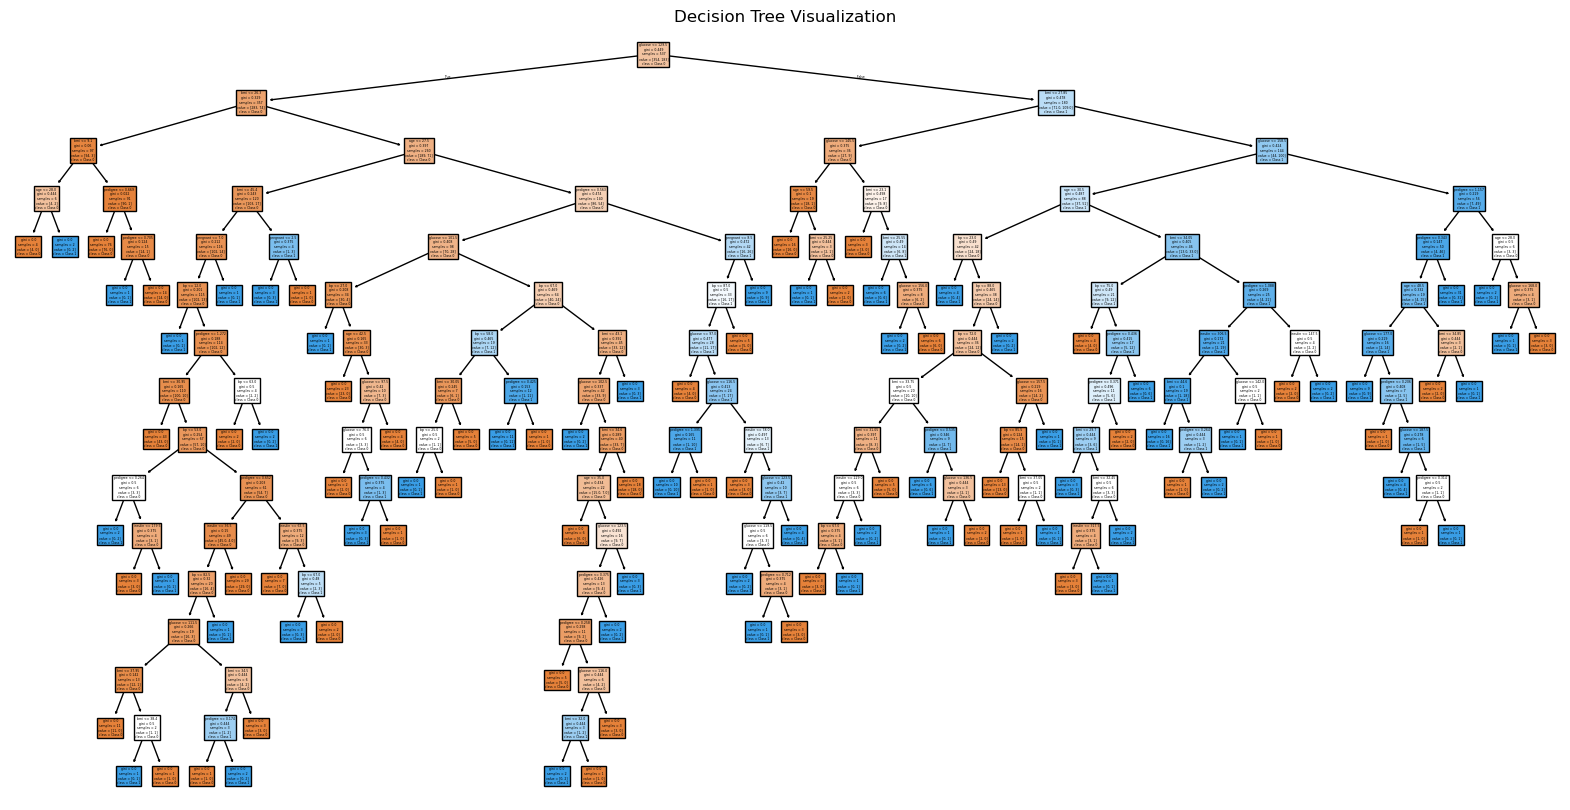

In [19]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(clf, feature_names=feature_train.columns, class_names=['Class 0', 'Class 1'], filled=True)
plt.title("Decision Tree Visualization")
plt.show()

In [20]:
from sklearn.tree import export_text

# Extract and print the rules of the decision tree
tree_rules = export_text(clf, feature_names=list(feature_train.columns))
print(tree_rules)

|--- glucose <= 129.50
|   |--- bmi <= 26.30
|   |   |--- bmi <= 9.10
|   |   |   |--- age <= 28.00
|   |   |   |   |--- class: 0
|   |   |   |--- age >  28.00
|   |   |   |   |--- class: 1
|   |   |--- bmi >  9.10
|   |   |   |--- pedigree <= 0.67
|   |   |   |   |--- class: 0
|   |   |   |--- pedigree >  0.67
|   |   |   |   |--- pedigree <= 0.71
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- pedigree >  0.71
|   |   |   |   |   |--- class: 0
|   |--- bmi >  26.30
|   |   |--- age <= 27.50
|   |   |   |--- bmi <= 45.40
|   |   |   |   |--- pregnant <= 7.00
|   |   |   |   |   |--- bp <= 12.00
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- bp >  12.00
|   |   |   |   |   |   |--- pedigree <= 1.27
|   |   |   |   |   |   |   |--- bmi <= 30.95
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- bmi >  30.95
|   |   |   |   |   |   |   |   |--- bp <= 53.00
|   |   |   |   |   |   |   |   |   |--- pedigree <= 0.26
|   |   |   |   |   |   

In [21]:
# Get feature importances
importance = clf.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': feature_train.columns,
    'Importance': importance
}).sort_values(by='Importance', ascending=False)

print(feature_importance_df)

    Feature  Importance
4   glucose    0.319428
2       bmi    0.221676
5        bp    0.150059
6  pedigree    0.145486
3       age    0.084946
1   insulin    0.051944
0  pregnant    0.026462


Glucose has the highest importance score of 0.314971, indicating that it was the most critical feature in the model's decisions. The second most important feature is bmi (Body Mass Index), with an importance of 0.209135.

In [23]:
0.314971 + 0.209135 + 0.142925 + 0.132257 + 0.105579 + 0.053295 + 0.041838

1.0

# KNN Classification

KNN has three basic properties, which are non-parametric, lazy learner, and instance-based
learning. Non-parametric means the algorithm is distribution-free and there is no need for
parameters such as mean and standard deviation. Lazy learner means KNN does not train
the model; that is, the model is trained in the testing phase. This makes for faster training
but slower testing. It is also more time- and memory-consuming. Instance-based learning
means the predicted outcome is based on the similarity with its nearest neighbors. It does
not create any abstract equations or rules for prediction; instead, it stores all the data and
queries each record.

In [26]:
# Import KNN model
from sklearn.neighbors import KNeighborsClassifier

# Create a KNN classifier object
model = KNeighborsClassifier(n_neighbors=3)

# Train the model using the training dataset
model.fit(feature_train,target_train)

# Predict the target variable for test dataset
predictions = model.predict(feature_test)

In [27]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

# Calculate model accuracy
print("Accuracy:",accuracy_score(target_test, predictions))

# Calculate model precision
print("Precision:",precision_score(target_test, predictions))

# Calculate model recall
print("Recall:",recall_score(target_test, predictions))

# Calculate model f1 score
print("F1-Score:",f1_score(target_test, predictions))

Accuracy: 0.7532467532467533
Precision: 0.7058823529411765
Recall: 0.5647058823529412
F1-Score: 0.6274509803921569


KNN Model Accuracy: 0.75


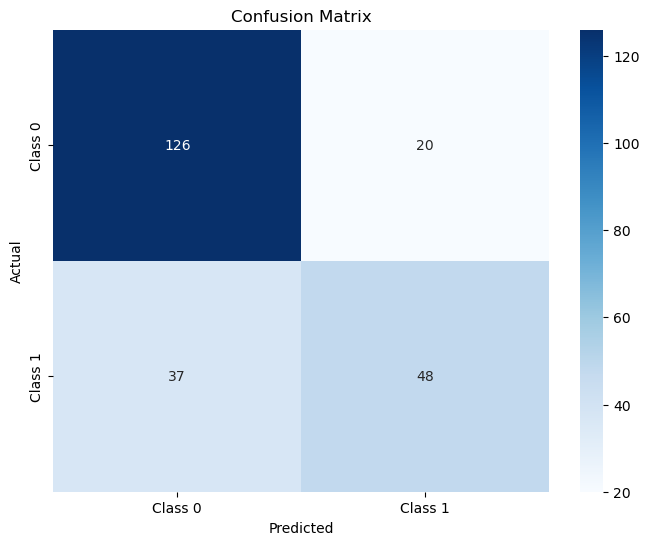

In [28]:
from sklearn.metrics import accuracy_score, confusion_matrix

# Calculate and print accuracy
accuracy = accuracy_score(target_test, predictions)
print(f"KNN Model Accuracy: {accuracy:.2f}")

# Create and plot a confusion matrix
cm = confusion_matrix(target_test, predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

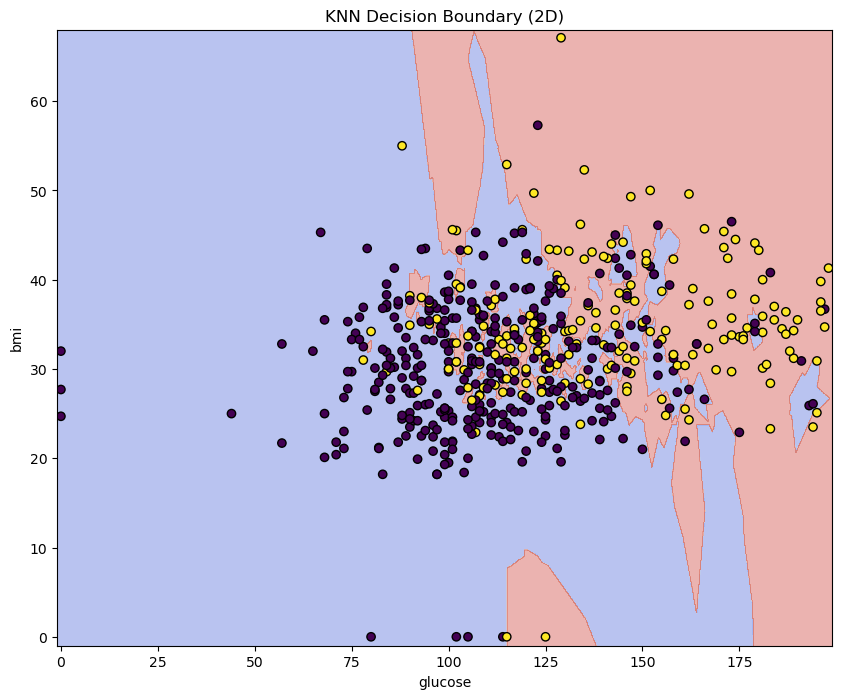

In [29]:
# Working only with Glucose and BMI for visualization
feature_train_2d = feature_train[['glucose', 'bmi']]
feature_test_2d = feature_test[['glucose', 'bmi']]


# Create a KNN classifier object
model_2d = KNeighborsClassifier(n_neighbors=3)

# Train the model on the 2D features
model_2d.fit(feature_train_2d, target_train)

# Create a meshgrid for the decision boundary
x_min, x_max = feature_train_2d['glucose'].min() - 1, feature_train_2d['glucose'].max() + 1
y_min, y_max = feature_train_2d['bmi'].min() - 1, feature_train_2d['bmi'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

# Combine the meshgrid into a DataFrame with correct feature names
meshgrid_df = pd.DataFrame(np.c_[xx.ravel(), yy.ravel()], columns=['glucose', 'bmi'])

# Predict on the meshgrid using the 2D model
Z = model_2d.predict(meshgrid_df)
Z = Z.reshape(xx.shape)

# Plot decision boundary
plt.figure(figsize=(10, 8))
plt.contourf(xx, yy, Z, alpha=0.4, cmap='coolwarm')
plt.scatter(feature_train_2d['glucose'], feature_train_2d['bmi'], c=target_train, marker='o', edgecolor='k')
plt.xlabel('glucose')
plt.ylabel('bmi')
plt.title('KNN Decision Boundary (2D)')
plt.show()

# SVM Classification

SVM is a discriminative model that generates optimal hyperplanes with a large margin in
n-dimensional space to separate data points. The basic idea is to discover the **Maximum
Marginal Hyperplane (MMH)** that perfectly separates data into given classes. The
maximum margin means the maximum distance between data points of both classes.

In [32]:
# Import SVM model
from sklearn import svm

# Create a SVM classifier object
clf = svm.SVC(kernel='linear')

# Train the model using the training sets
clf.fit(feature_train,target_train)

# Predict the target variable for test dataset
predictions = clf.predict(feature_test)

In [33]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

# Calculate model accuracy
print("Accuracy:",accuracy_score(target_test, predictions))

# Calculate model precision
print("Precision:",precision_score(target_test, predictions))

# Calculate model recall
print("Recall:",recall_score(target_test, predictions))

# Calculate model f1 score
print("F1-Score:",f1_score(target_test, predictions))

Accuracy: 0.7835497835497836
Precision: 0.7868852459016393
Recall: 0.5647058823529412
F1-Score: 0.6575342465753424


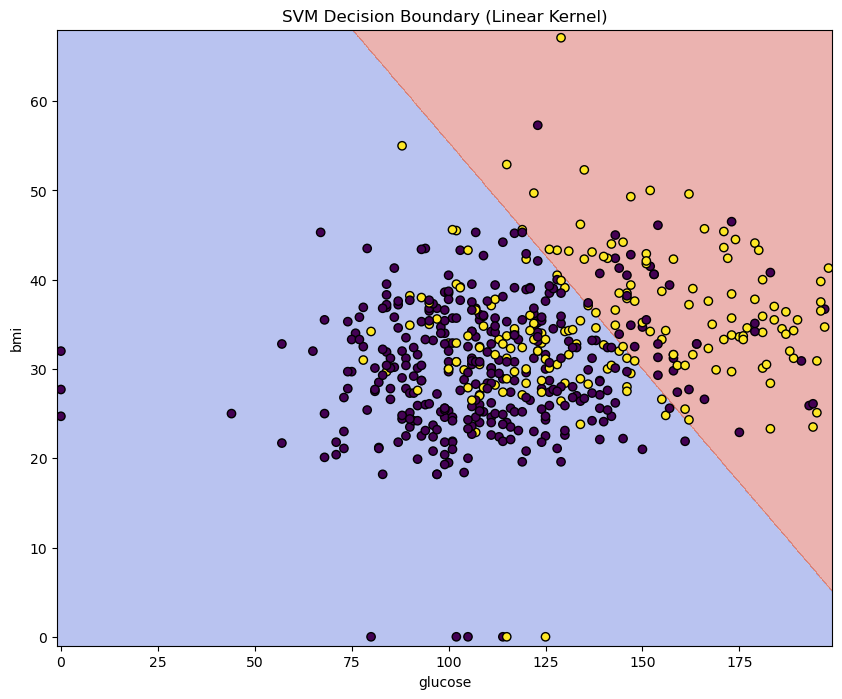

In [34]:
# Select two features for visualization
feature_1 = 'glucose'
feature_2 = 'bmi'
feature_train_2d = feature_train[[feature_1, feature_2]]
feature_test_2d = feature_test[[feature_1, feature_2]]

# Create an SVM classifier with a linear kernel
clf = svm.SVC(kernel='linear')

# Train the model on the 2D features
clf.fit(feature_train_2d, target_train)

# Create a meshgrid for the decision boundary
x_min, x_max = feature_train_2d[feature_1].min() - 1, feature_train_2d[feature_1].max() + 1
y_min, y_max = feature_train_2d[feature_2].min() - 1, feature_train_2d[feature_2].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

# Combine the meshgrid into a DataFrame with the correct feature names
meshgrid_df = pd.DataFrame(np.c_[xx.ravel(), yy.ravel()], columns=[feature_1, feature_2])

# Predict on the meshgrid
Z = clf.predict(meshgrid_df)
Z = Z.reshape(xx.shape)

# Plot decision boundary
plt.figure(figsize=(10, 8))
plt.contourf(xx, yy, Z, alpha=0.4, cmap='coolwarm')

# Plot the training points
plt.scatter(feature_train_2d[feature_1], feature_train_2d[feature_2], c=target_train, edgecolor='k', marker='o')
plt.xlabel(feature_1)
plt.ylabel(feature_2)
plt.title('SVM Decision Boundary (Linear Kernel)')
plt.show()

# Evaluating the Classification Model Performance

In [36]:
# Use the raw link to access the actual CSV file
url = "https://raw.githubusercontent.com/PacktPublishing/Python-Data-Analysis-Third-Edition/refs/heads/master/Chapter09/diabetes.csv"

# Reading the CSV file
diabetes = pd.read_csv(url)

# Display the first 5 rows of the DataFrame
diabetes.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


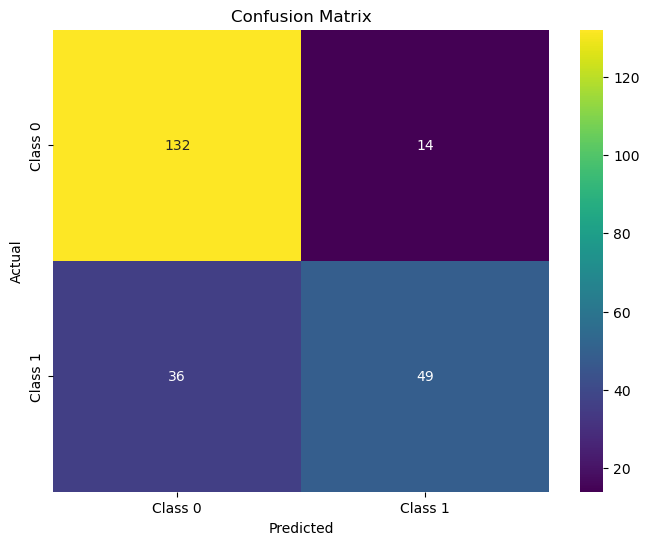

In [37]:
# split dataset in two parts: feature set and target label
feature_set = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
features = diabetes[feature_set]
target = diabetes.label

# partition data into training and testing set
from sklearn.model_selection import train_test_split
feature_train, feature_test, target_train, target_test = train_test_split(features, 
                                                                          target, 
                                                                          test_size=0.3, 
                                                                          random_state=1)
# Scale the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
feature_train_scaled = scaler.fit_transform(feature_train)
feature_test_scaled = scaler.transform(feature_test)

# import logistic regression scikit-learn model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Instantiate the model with increased max_iter
logreg = LogisticRegression(solver='lbfgs', max_iter=200)

# Fit the model with scaled data
logreg.fit(feature_train_scaled, target_train)

# Make predictions using scaled test data
predictions = logreg.predict(feature_test_scaled)

# Get prediction probability
predictions_prob = logreg.predict_proba(feature_test_scaled)[:, 1]

# Generate confusion matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(target_test, predictions)

# Plot confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='viridis', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [38]:
# import classification report
from sklearn.metrics import classification_report

# Create classification report
print(classification_report(target_test, predictions, target_names=['Yes(1)','No(0)']))

              precision    recall  f1-score   support

      Yes(1)       0.79      0.90      0.84       146
       No(0)       0.78      0.58      0.66        85

    accuracy                           0.78       231
   macro avg       0.78      0.74      0.75       231
weighted avg       0.78      0.78      0.78       231



In [39]:
import sklearn
print(sklearn.__version__)

1.5.2


In [40]:
import sklearn.metrics as metrics

# Loop through the items in sklearn.metrics and print them with an index
for i, item in enumerate(dir(metrics)):
    print(f"{i}: {item}")

0: ConfusionMatrixDisplay
1: DetCurveDisplay
2: DistanceMetric
3: PrecisionRecallDisplay
4: PredictionErrorDisplay
5: RocCurveDisplay
6: __all__
7: __builtins__
8: __cached__
9: __doc__
10: __file__
11: __loader__
12: __name__
13: __package__
14: __path__
15: __spec__
16: _base
17: _classification
18: _dist_metrics
19: _pairwise_distances_reduction
20: _pairwise_fast
21: _plot
22: _ranking
23: _regression
24: _scorer
25: accuracy_score
26: adjusted_mutual_info_score
27: adjusted_rand_score
28: auc
29: average_precision_score
30: balanced_accuracy_score
31: brier_score_loss
32: calinski_harabasz_score
33: check_scoring
34: class_likelihood_ratios
35: classification_report
36: cluster
37: cohen_kappa_score
38: completeness_score
39: confusion_matrix
40: consensus_score
41: coverage_error
42: d2_absolute_error_score
43: d2_log_loss_score
44: d2_pinball_score
45: d2_tweedie_score
46: davies_bouldin_score
47: dcg_score
48: det_curve
49: euclidean_distances
50: explained_variance_score
51: f

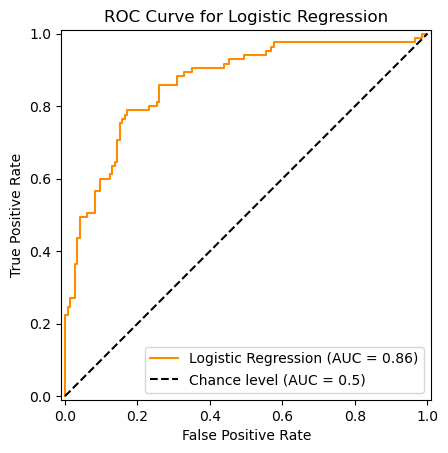

In [41]:
from sklearn.metrics import RocCurveDisplay

# Calculate predicted probabilities for the positive class (1)
predictions_prob = logreg.predict_proba(feature_test_scaled)[:, 1]

# Create and display the ROC curve
display = RocCurveDisplay.from_predictions(
    target_test,            # True labels
    predictions_prob,       # Predicted probabilities for the positive class
    name="Logistic Regression",
    color="darkorange",
    plot_chance_level=True  # Optionally, plot the chance level
)

# Customize plot labels and title
_ = display.ax_.set(
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
    title="ROC Curve for Logistic Regression"
)

# Save the plot as an image file
plt.savefig("data/roc_curve.png", format='png', dpi=300)  # Save the graph

plt.show()

#### AUC (Area Under Curve)

This is the area under the ROC curve. It quantifies the overall ability of the model to distinguish between positive and negative classes.

    AUC = 1.0: A perfect model.
    AUC = 0.5: A model that performs no better than random guessing.
    AUC = 0.86 in our case indicates that the model has a high ability to distinguish between the two classes.

In [43]:
from sklearn.metrics import roc_auc_score

# Compute the area under ROC curve
auc = roc_auc_score(target_test, predictions_prob)

# Print auc value
print("Area Under Curve:",auc.round(4))

Area Under Curve: 0.8633
